In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nozzle import Spectral, Params, Nozzle, Boundary
from scipy.integrate import simpson
from scipy.special import legendre

# Legendre-Galerkin Method


<Axes: xlabel='$z$', ylabel='$\\tilde{v}$'>

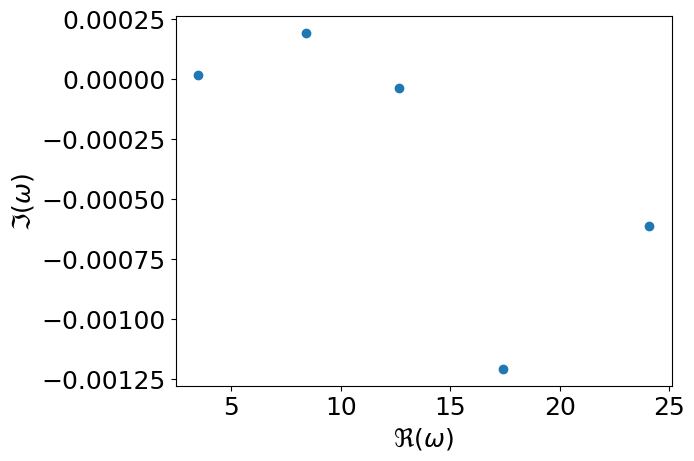

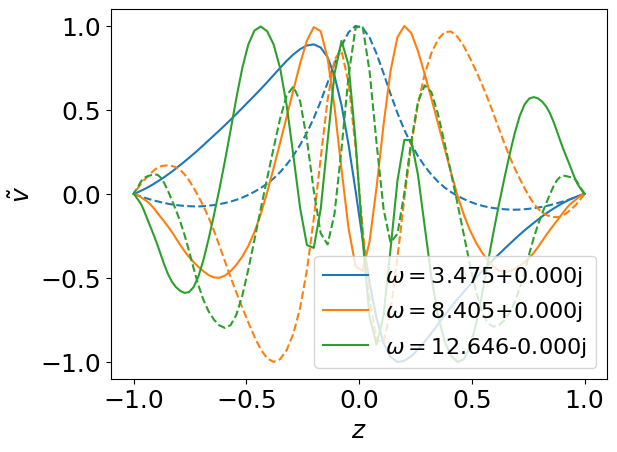

In [24]:
N = 30 # number of basis
M = 101 # number of points
Mm = 1.5
constant_v = False
accelerating = False
boundary = Boundary.FIXED_FIXED
params = Params(Mm, constant_v, accelerating, boundary)

spectral = Spectral(M, "symmetric", "CH")
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2

u = lambda x,n: (legendre(n) - legendre(n+2))(x)
nozzle = Nozzle(params, x, lambda x,n: u(x,n))
v0 = nozzle.v0

A2 = np.zeros((N,N),dtype=complex)
A1 = np.zeros((N,N),dtype=complex)
A0 = np.zeros((N,N),dtype=complex)
for i in range(N):
    for j in range(N):
        A2[i,j] = simpson(u(x,i)*u(x,j),x=x)
        A1[i,j] = 2j*simpson(u(x,i)*v0*(D1@u(x,j)) + u(x,i)*(D1@v0)*u(x,j),x=x)
        A0[i,j] = simpson(
            u(x,i)*(1-v0**2)*(D2@u(x,j)) -
            u(x,i)*(3*v0+1/v0)*(D1@v0)*(D1@u(x,j)) - 
            u(x,i)*(1-1/v0**2)*(D1@v0)**2*u(x,j) -
            u(x,i)*(v0+1/v0)*(D2@v0)*u(x,j),
            x=x)

C, nozzle.omega = nozzle.solve(A0,A1,A2)
nozzle.V = np.zeros((x.size, C.shape[1]),dtype=complex)
for i in range(C.shape[1]):
    for n in range(N):
        nozzle.V[:, i] += C[n,i]*u(x, n)
nozzle.sort_solutions(real_range=[0,25], imag_range=[-1,1])
nozzle.plot_eigenvalues()
nozzle.plot_eigenfunctions()
# nozzle.save_data("galerkin")

## Fixed-open Boundary

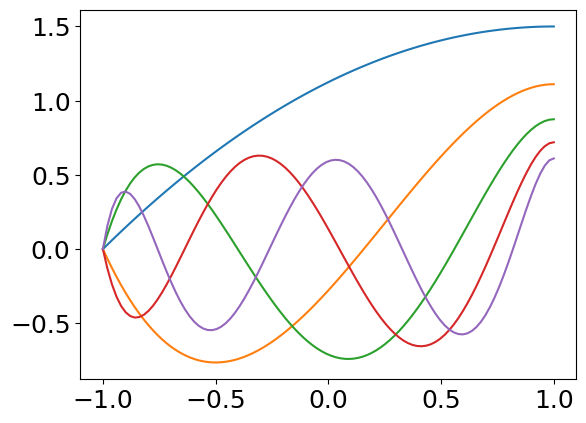

In [2]:
# fixed open
x = np.linspace(-1,1,100)
u = lambda x,n: (legendre(n) + (2*n+3)/(n+2)**2*legendre(n+1) - (n+1)**2/(n+2)**2*legendre(n+2))(x)
for k in range(5):
    plt.plot(x,u(x,k))

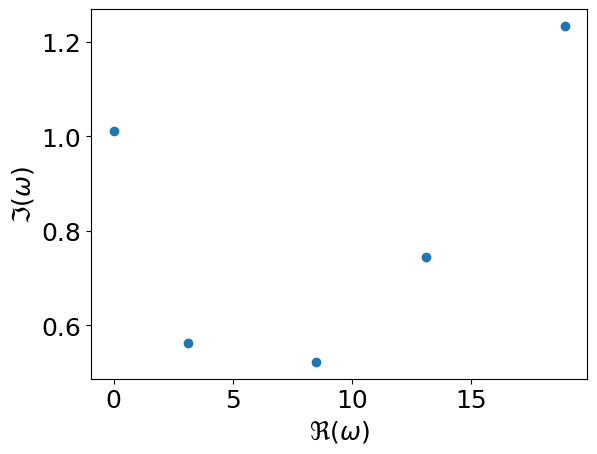

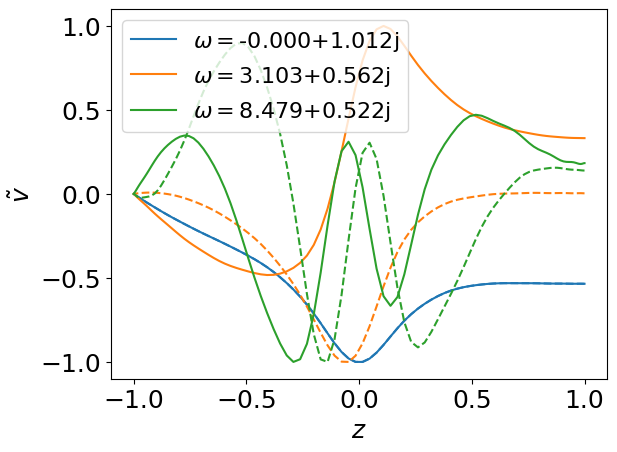

In [18]:
N = 25 # number of basis
M = 101 # number of points
Mm = 1.5
constant_v = False
accelerating = False
boundary = Boundary.FIXED_OPEN
params = Params(Mm, constant_v, accelerating, boundary)

spectral = Spectral(M, "symmetric", "CH")
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2

nozzle = Nozzle(params, x, lambda x,n: u(x,n))
v0 = nozzle.v0

A2 = np.zeros((N,N),dtype=complex)
A1 = np.zeros((N,N),dtype=complex)
A0 = np.zeros((N,N),dtype=complex)
for i in range(N):
    for j in range(N):
        A2[i,j] = simpson(u(x,i)*u(x,j),x=x)
        A1[i,j] = 2j*simpson(u(x,i)*v0*(D1@u(x,j)) + u(x,i)*(D1@v0)*u(x,j),x=x)
        A0[i,j] = simpson(
            u(x,i)*(1-v0**2)*(D2@u(x,j)) -
            u(x,i)*(3*v0+1/v0)*(D1@v0)*(D1@u(x,j)) - 
            u(x,i)*(1-1/v0**2)*(D1@v0)**2*u(x,j) -
            u(x,i)*(v0+1/v0)*(D2@v0)*u(x,j),
            x=x)

C, nozzle.omega = nozzle.solve(A0,A1,A2)
nozzle.V = np.zeros((x.size, C.shape[1]),dtype=complex)
for i in range(C.shape[1]):
    for n in range(N):
        nozzle.V[:, i] += C[n,i]*u(x, n)
nozzle.sort_solutions(real_range=[-1,25], imag_range=[0,3])
nozzle.plot_eigenvalues()
nozzle.plot_eigenfunctions()
nozzle.save_data("galerkin")

In [39]:
a = np.array([1,2,3])
b = np.array([2,2,2])
a@b

12